# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

### Импортируем данные

In [80]:
try:
    reg1 = pd.read_csv('geo_data_0.csv')
    reg2 = pd.read_csv('geo_data_1.csv')
    reg3 = pd.read_csv('geo_data_2.csv')
except:
    reg1 = pd.read_csv('/datasets/geo_data_0.csv')
    reg2 = pd.read_csv('/datasets/geo_data_0.csv')
    reg3 = pd.read_csv('/datasets/geo_data_0.csv')


### Знакомимся с данными

In [81]:
def df_info(df):
    display(df.info())
    display(df.head())
    display(df.describe())
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    
    print('Распределение признаков и целевого параметра')
    sns.histplot(df['f0'], ax=axes[0][0])
    sns.histplot(df['f1'], ax=axes[0][1])
    sns.histplot(df['f2'], ax=axes[1][0])
    sns.histplot(df['product'], ax=axes[1][1])
    

Первый регион

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Распределение признаков и целевого параметра


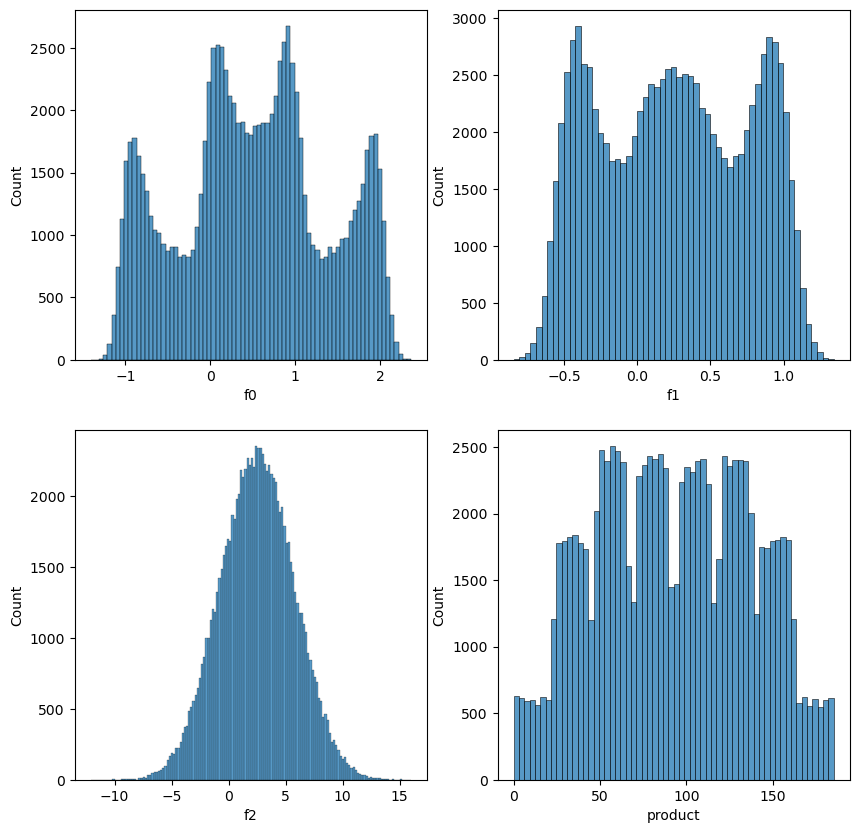

In [82]:
df_info(reg1)

Второй регион

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Распределение признаков и целевого параметра


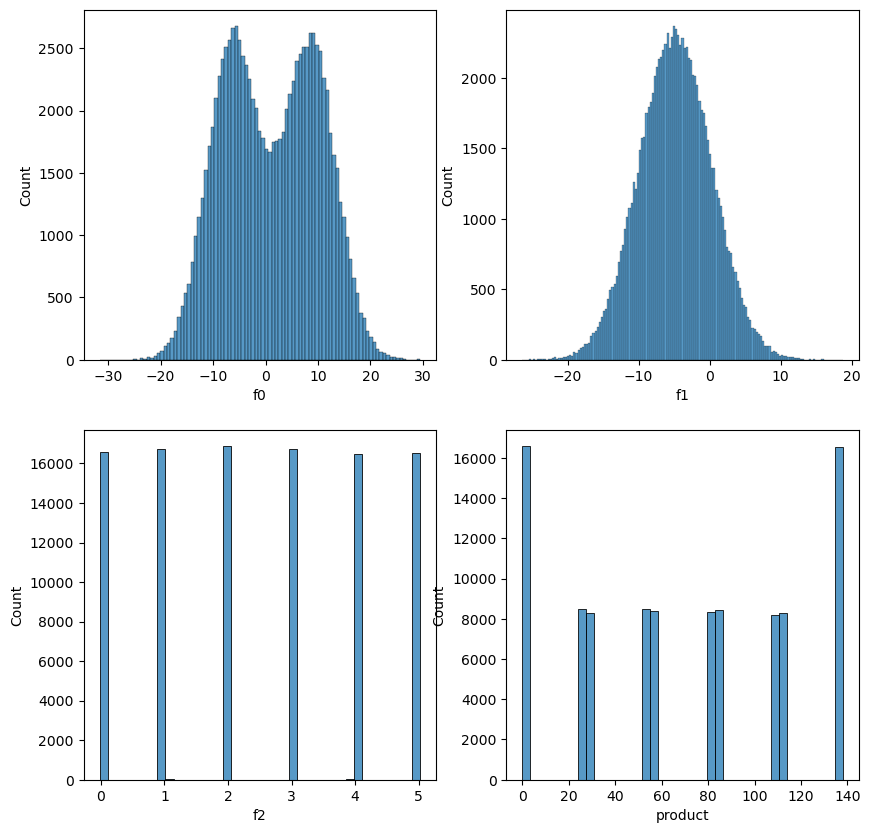

In [83]:
df_info(reg2)

Третий регион

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Распределение признаков и целевого параметра


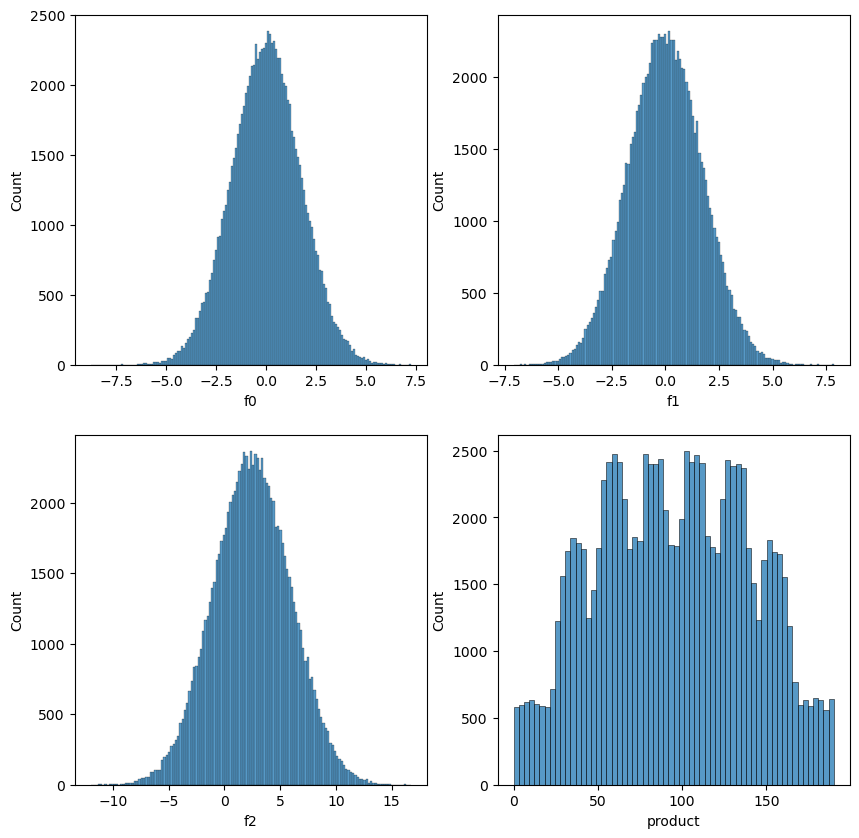

In [84]:
df_info(reg3)

### Подготовка данных

In [85]:
scaler = StandardScaler()

def prep(dataframe):
    X = dataframe.drop(['id', 'product'], axis=1)
    y = dataframe['product']

    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.25, random_state=12345
    )
    
    scaler.fit_transform(X_train)
    X_test = scaler.transform(X_valid)
    
    return X_train, X_valid, y_train, y_valid

## Обучение и проверка модели

In [86]:
model = LinearRegression()

def get_predictions(dataframe):
    X_train, X_valid, y_train, y_valid = prep(dataframe)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred = pd.Series(data=y_pred, index=y_valid.index)
    
    print('Средний запас предсказанного сырья в скважине:',
          "{:.3f}".format(y_pred.mean()))
    print('RMSE модели:',
          "{:.3f}".format(mean_squared_error(y_valid, y_pred, squared=False)))
    
    return y_pred, y_valid

Показатели первого региона

In [87]:
y_pred_reg1, y_valid_reg1 = get_predictions(reg1)

Средний запас предсказанного сырья в скважине: 92.593
RMSE модели: 37.579


Показатели второго региона

In [88]:
y_pred_reg2, y_valid_reg2 = get_predictions(reg2)

Средний запас предсказанного сырья в скважине: 68.729
RMSE модели: 0.893


Показатели третьего региона

In [89]:
y_pred_reg3, y_valid_reg3 = get_predictions(reg3)

Средний запас предсказанного сырья в скважине: 94.965
RMSE модели: 40.030


## Подготовка к расчёту прибыли

In [309]:
budget = 10e+9
profit_per_unit = 450e+3
total_wells = 500
selected_wells = 200
print('Нужно сырья в скважине для точки безубыточности:',
     "{:.3f}".format((budget/select_well)/profit_per_unit))

def get_revenue(y_pred, y_valid):
    best_pred = y_pred.sort_values(ascending=False).head(selected_wells)
    true_wells_total = y_valid[best_pred.index].sum()
    return (true_wells_total * profit_per_unit - budget)

Нужно сырья в скважине для точки безубыточности: 111.111


## Расчёт прибыли и рисков 

In [318]:



def estimate_profit(y_pred, y_valid):
    state = np.random.RandomState(12345)
    revenues = []
    for _ in range(1000):
        y_pred_subsample = y_pred.sample(total_wells, replace=True, random_state=state)
        revenue = get_revenue(y_pred_subsample, y_valid)
        revenues.append(revenue)
    
    revenues = pd.Series(revenues)
    print('Средняя прибыль:', revenues.mean())
    print('95% доверительный интервал:')
    print('От', revenues.quantile(0.025))
    print('До', revenues.quantile(0.975))
    print('Риск убытков:', stats.percentileofscore(revenues, 0))


In [319]:
estimate_profit(y_pred_reg1, y_valid_reg1)

Средняя прибыль: 396164984.8023711
95% доверительный интервал:
От -111215545.89049526
До 909766941.5534226
Шанс 6.9


In [320]:
estimate_profit(y_pred_reg2, y_valid_reg2)

Средняя прибыль: 456045105.7866608
95% доверительный интервал:
От 33820509.39898363
До 852289453.866036
Шанс 1.5


In [321]:
estimate_profit(y_pred_reg3, y_valid_reg3)

Средняя прибыль: 404403866.5683568
95% доверительный интервал:
От -163350413.39560106
До 950359574.9237995
Шанс 7.6000000000000005


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован